# Problem Statement :
The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection. Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

My goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.



# Data Set Description:
The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’.The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.

The data set includes:

Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not.
Highly Malignant: It denotes comments that are highly malignant and hurtful.
Rude: It denotes comments that are very rude and offensive.
Threat: It contains indication of the comments that are giving any threat to someone. Abuse: It is for comments that are abusive in nature.
Loathe: It describes the comments which are hateful and loathing in nature.
ID: It includes unique Ids associated with each comment text given.
Comment text: This column contains the comments extracted from various social media platforms.


This problem is a  supervised multi class classification problem, Target variable is malignant,highly_malignant,rude,threat,abuse and loathe.

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore') #Importing warning library to avoid any warnings

In [2]:
## Loading Train DataSet:
df=pd.read_csv('train.csv') 
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
## Loading Test DataSet:
df_test =pd.read_csv('test.csv') 

df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [4]:
## Shape of Train data:
df.shape

(159571, 8)

In Train data, 159571 rows and 8 columns. 

In [5]:
## Shape of Test data:
df_test.shape

(153164, 2)

In Test data, 153164 rows and 2 columns. 

In [6]:
## Data type:
df.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

Apart from id and comment_text,rest columns datatype is int. 

In [7]:
## Checking null values in Train data set:-
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

There is not any null/missing values in train data set.

In [8]:
## Checking null values in Test data set:-
df_test.isnull().sum()

id              0
comment_text    0
dtype: int64

There is not any null/missing values in test data set.

# EDA

In [9]:
df['comment_text'][0]


"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

By observing above comment, I can say that a lot of text processing needed as there are many words which are not important
for prediction.

In [10]:
labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
for i in labels:
    print('Value Counts of',i)
    print(df[i].value_counts())
    print('-'*100)


Value Counts of malignant
0    144277
1     15294
Name: malignant, dtype: int64
----------------------------------------------------------------------------------------------------
Value Counts of highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64
----------------------------------------------------------------------------------------------------
Value Counts of rude
0    151122
1      8449
Name: rude, dtype: int64
----------------------------------------------------------------------------------------------------
Value Counts of threat
0    159093
1       478
Name: threat, dtype: int64
----------------------------------------------------------------------------------------------------
Value Counts of abuse
0    151694
1      7877
Name: abuse, dtype: int64
----------------------------------------------------------------------------------------------------
Value Counts of loathe
0    158166
1      1405
Name: loathe, dtype: int64
-------------------------------

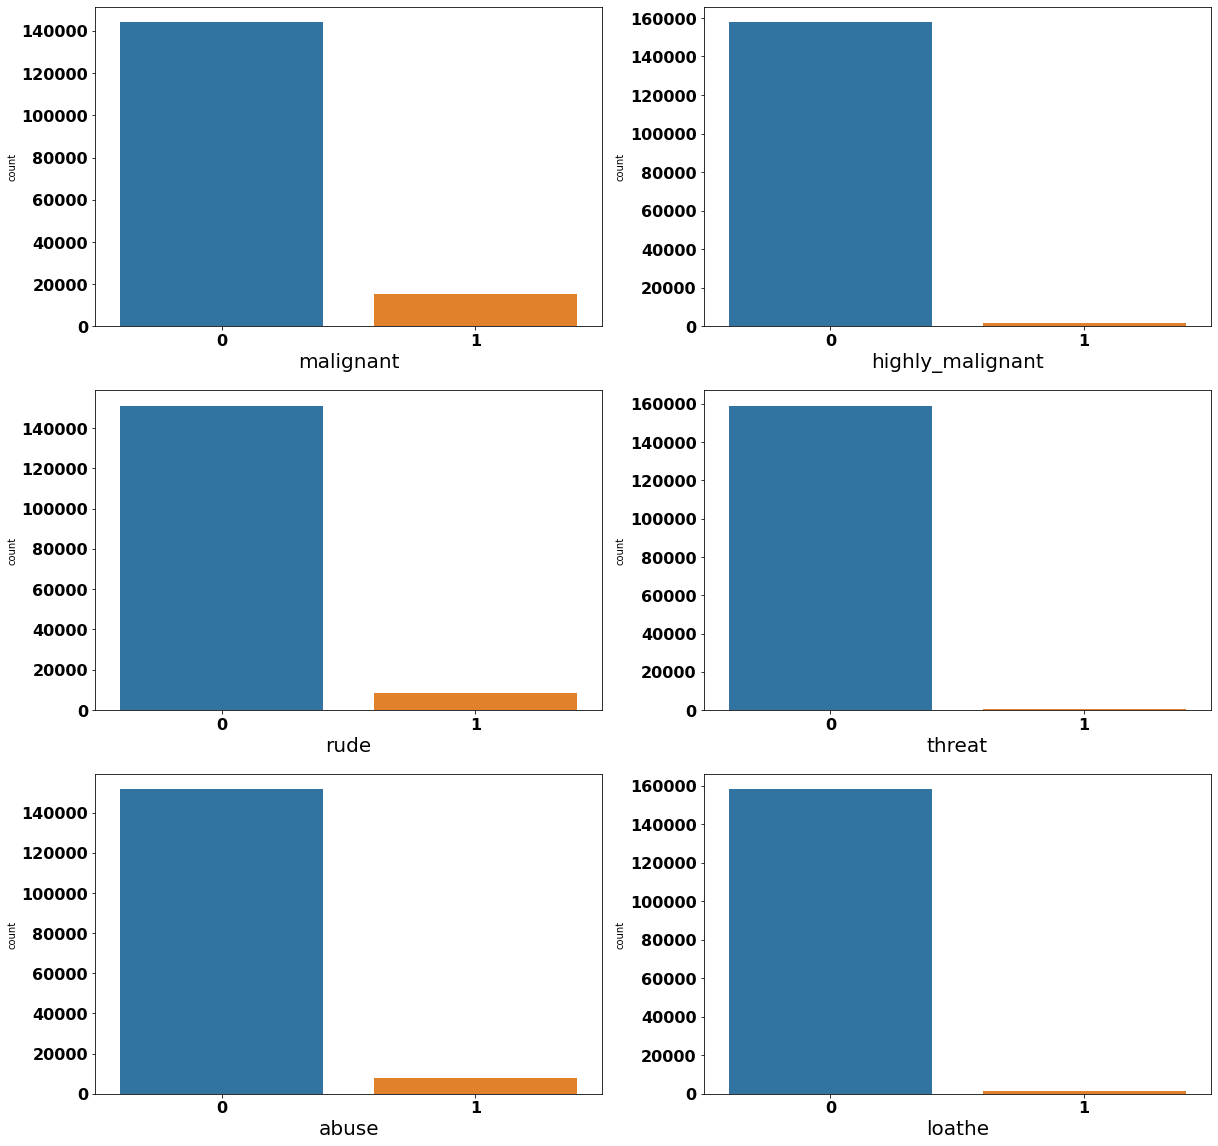

In [11]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for col in labels:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.countplot(df[col])
        plt.xlabel(col,fontsize=20)
        plt.xticks(fontsize=16,fontweight ='bold')
        plt.yticks(fontsize=16,fontweight ='bold')
    plotnumber += 1
plt.show()


Observations:-
-> Most of the comments are malignant followed by rude and abuse.
-> Highly_malignant, loathe and threat are very less in count.

In [12]:
#Checking the percentage of the comments
non_malignant = df[(df['malignant']!=1) & (df['highly_malignant']!=1) & (df['rude']!=1) & 
                            (df['threat']!=1) & (df['abuse']!=1) & (df['loathe']!=1)]
percent=len(non_malignant)/len(df)*100
print('Percentage of good/neutral comments = ',percent)
print('Percentage of negative comments = ', (100-percent))

Percentage of good/neutral comments =  89.83211235124176
Percentage of negative comments =  10.167887648758239


Around 90% of comments are Good/Neutral in nature.
Around 10% of comments are negative comments

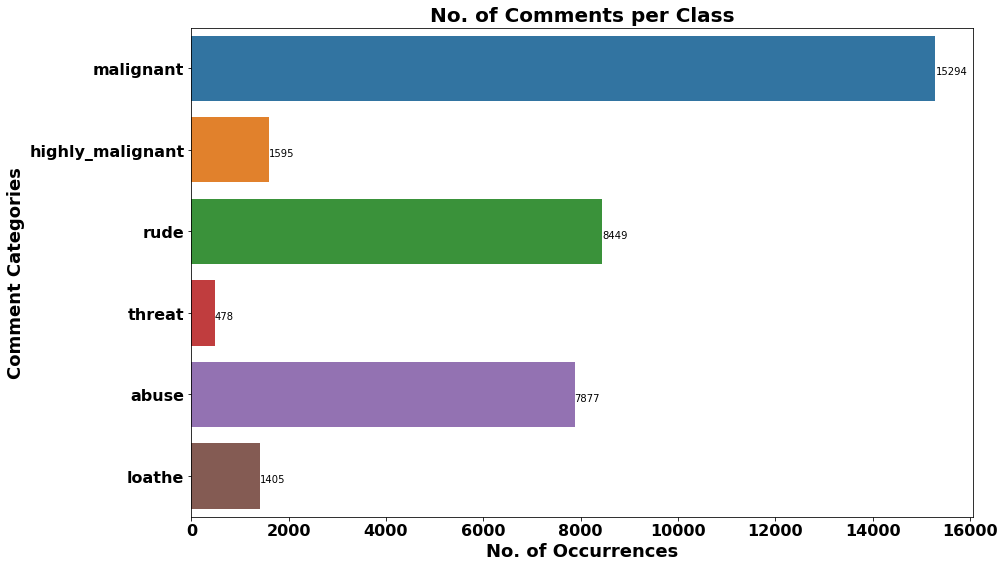

In [13]:
#Create a new subset of the data by only taking the 2nd column onwards (comments and categories)
data_count = df.iloc[:,2:].sum()

# Plot a chart with the following size
plt.figure(figsize=(14,9))

# Plot a bar chart using the index (category values) and the count of each category.
ax = sns.barplot(y= data_count.index, x =data_count.values)

plt.title("No. of Comments per Class", fontsize=20, fontweight='bold')
plt.ylabel('Comment Categories', fontsize=18,fontweight='bold')
plt.xlabel('No. of Occurrences', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
# rects = ax.patches
# labels = data_count.values
# for rect, label in zip(rects, labels):
#     width = rect.get_width()
#     ax.text(rect.get_y() + rect.get_height()/2, width , label, ha='center', va='bottom')
initialx=0
for p in ax.patches:
    ax.text(p.get_width(),initialx+p.get_height()/10,"{:1.0f}".format(p.get_width()))
    initialx+=1


    
plt.show()


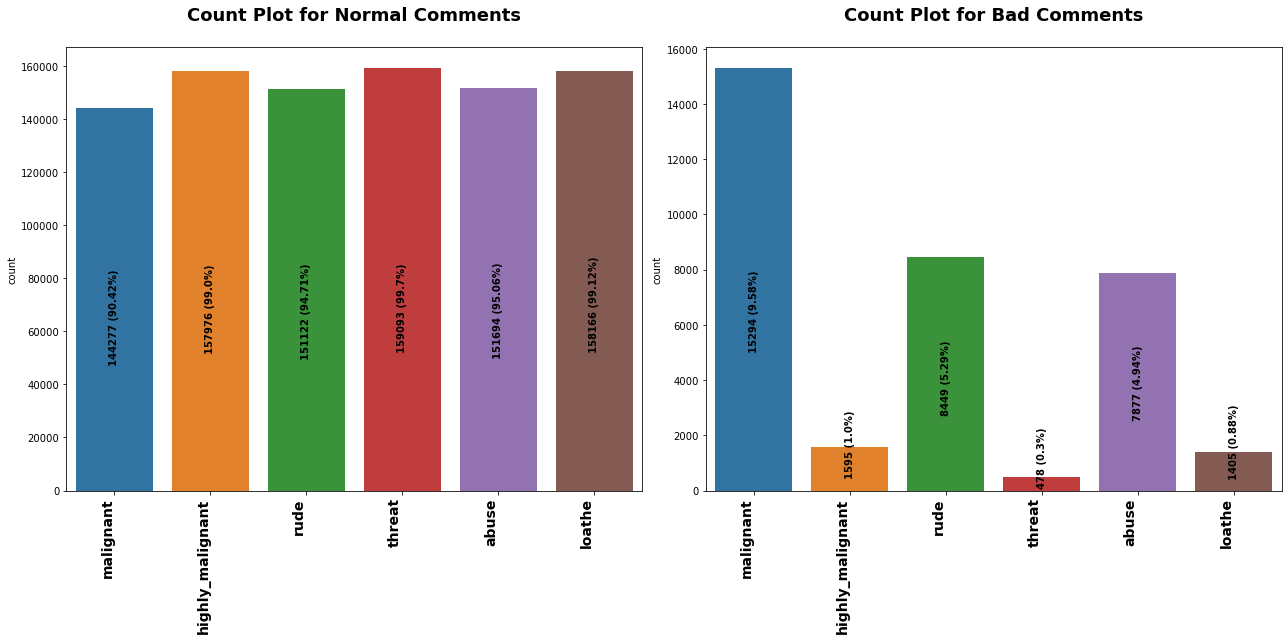

In [41]:
# comparing normal comments and bad comments using count plot

fig, ax = plt.subplots(1,2,figsize=(18,9))

for i in range(2):
    sns.countplot(data=df[df.columns[2:]][df[df.columns[2:]]==i], ax=ax[i])
    if i == 0:
        ax[i].set_title("Count Plot for Normal Comments\n", fontsize=18, fontweight='bold')
    else:
        ax[i].set_title("Count Plot for Bad Comments\n", fontsize=18, fontweight='bold')
        
    ax[i].set_xticklabels(df.columns[2:], rotation=90, ha="right", fontsize=14, fontweight='bold')
    p=0
    for prop in ax[i].patches:
        count = prop.get_height()
        s = f"{count} ({round(count*100/len(df),2)}%)"
        ax[i].text(p,count/3,s,rotation=90, ha="center", fontweight="bold")
        p += 1
plt.tight_layout()
plt.show()


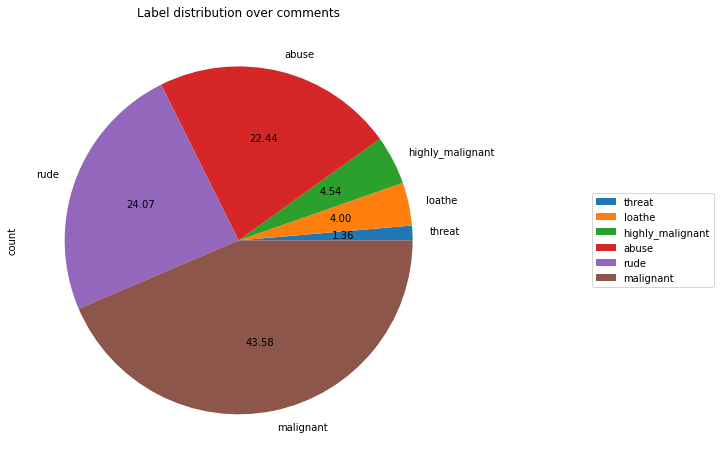

In [14]:
#Visualizing the label distribution of comments using pie chart
comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
df_distribution = df[df.columns[2:]].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y = 'count', title = 'Label distribution over comments',
                         autopct='%2.2f', figsize = (8,8))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()


Observation :
Out of total negative comments around 43.58% are malignant in nature followed by 24.07% are rude comments.

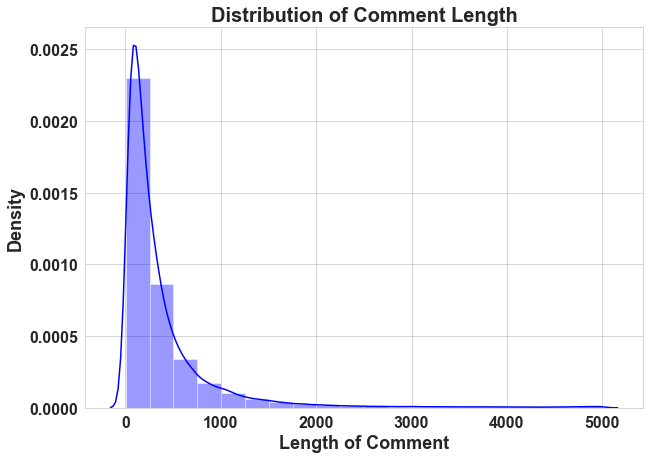

In [15]:
#Distribution of comments length
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
comment_len = df.comment_text.str.len()
sns.distplot(comment_len, bins=20, color = 'blue')

plt.title("Distribution of Comment Length", fontsize=20, fontweight='bold')
plt.ylabel('Density', fontsize=18,fontweight='bold')
plt.xlabel('Length of Comment', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()


Above is a plot showing the comment length frequency. As noticed, most of the comments are short with only a few comments 
longer than 1000 words. Majority of the comments are of length 500, where maximum length is 5000 and minimum length is 5.

In [16]:
#Checking correlation of the dataset
corr=df.corr()  
corr

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


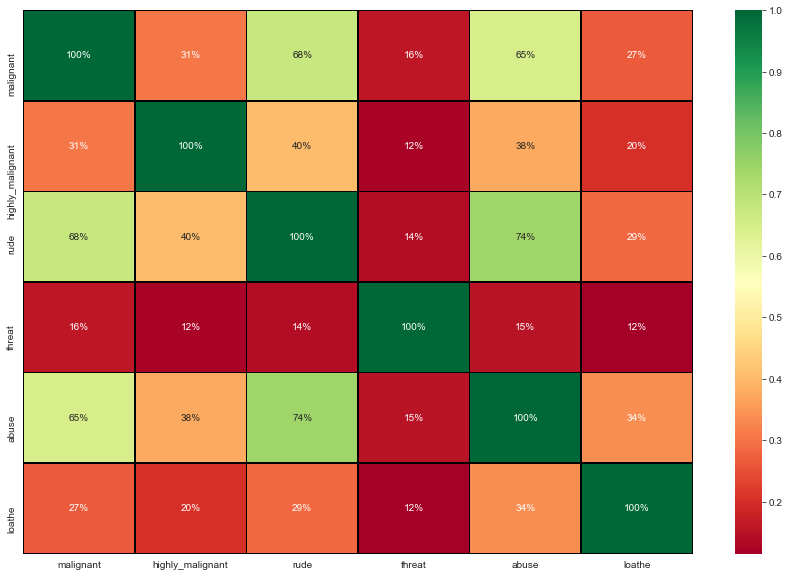

In [17]:
# Plotting heatmap for visualizing the correlation
plt.figure(figsize=(15, 10))
corr = df.corr() # corr() function provides the correlation value of each column
sns.heatmap(corr, linewidth=0.5, linecolor='black', fmt='.0%', cmap='RdYlGn', annot=True)
plt.show()


-> The highest positive correlation is seen in between fields 'rude' and 'abuse' more than 70% .
-> Malignant is strongly correlated with abuse and rude.
-> Attribute 'threat' is weakly correlated with each and every other feature of this training dataset.
-> Almost all variable are weakly correlated with each other.

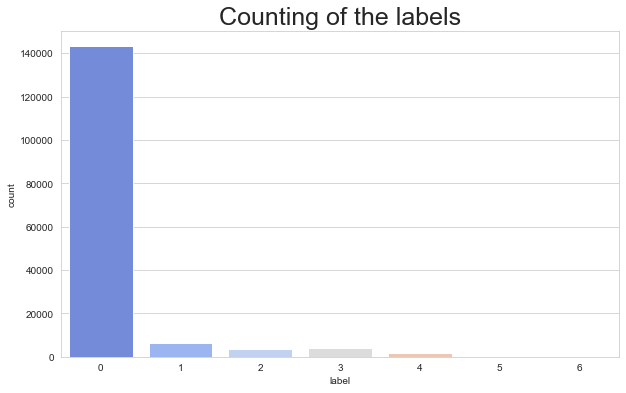

In [18]:
#Checking the count of labels
df['label']=df[comments_labels].sum(axis=1)
plt.figure(figsize=(10,6))
sns.countplot(df['label'], palette='coolwarm')
plt.title('Counting of the labels',fontsize=25)
plt.show()


# Length before cleaning in Training dataset:

In [19]:
df['length_before_cleaning'] = df['comment_text'].map(lambda comment_text: len(comment_text))
df


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0,295
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0,99
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0,81
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,0,116


In [ ]:
# Length before cleaning in Test dataset:

In [20]:
df_test['length_before_cleaning'] = df_test['comment_text'].map(lambda comment_text: len(comment_text))
df_test


,id,comment_text,length_before_cleaning
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,00017563c3f7919a,":If you have a look back at the source, the in...",205
4,00017695ad8997eb,I don't anonymously edit articles at all.,41
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",60
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,198
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",423
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",502


## Now Text processing as per machine understandable format:-
Operation perform are as followed:

-> Removing Punctuations and other special characters

-> Word Tokenzation

-> Removing Stop Words

-> Stemming and Lemmatising

-> Applying Count Vectoriser



In [21]:
#Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [22]:
#Replacing '\n' in comment_text
df['comment_text'] = df['comment_text'].replace('\n',' ')


In [23]:
#Defining the stop words
stop_words = stopwords.words('english')

#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()


In [24]:
#Function Definition for using regex operations and other text preprocessing for getting cleaned texts

def format_comments(text):
    
    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^[a-z0-9]+[\._]?[ a-z0-9]+[@]\w+[. ]\w{2,3}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)


In [25]:
# Apply above function for the column comment_text in training dataset to replace original with cleaned text
df['comment_text'] = df['comment_text'].apply(format_comments)
df['comment_text'].head()


0    explanation edits made username hardcore metal...
1    aww match background colour seemingly stuck th...
2    hey man really trying edit war guy constantly ...
3    make real suggestion improvement wondered sect...
4                        sir hero chance remember page
Name: comment_text, dtype: object

In [26]:
# Creating a column 'len_after_cleaning'
# Representing the length of the each comment respectively in a column 'comment_text' after cleaning the text.
df['length_after_cleaning'] = df['comment_text'].map(lambda comment_text: len(comment_text))
df.head()


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,length_after_cleaning
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,264,156
1,000103f0d9cfb60f,aww match background colour seemingly stuck th...,0,0,0,0,0,0,0,112,67
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0,233,141
3,0001b41b1c6bb37e,make real suggestion improvement wondered sect...,0,0,0,0,0,0,0,622,364
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,0,67,29


In [27]:
print("Total Words Removed:", (df.length_before_cleaning.sum()) - (df.length_after_cleaning.sum()))


Total Words Removed: 24416722


# Now doing same process with Test dataset

In [28]:
df_test['comment_text'] = df_test['comment_text'].apply(format_comments)
df_test['comment_text'].head()


0    yo bitch ja rule succesful ever whats hating s...
1                                   rfc title fine imo
2                           source zawe ashton lapland
3    look back source information updated correct f...
4                             anonymously edit article
Name: comment_text, dtype: object

In [30]:
# Creating a column 'len_after_cleaning'
# Representing the length of the each comment respectively in a column 'comment_text' after cleaning the text.
df_test['length_after_cleaning'] = df_test['comment_text'].map(lambda comment_text: len(comment_text))
df_test.head()


,id,comment_text,length_before_cleaning,length_after_cleaning
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,367,235
1,0000247867823ef7,rfc title fine imo,50,18
2,00013b17ad220c46,source zawe ashton lapland,54,26
3,00017563c3f7919a,look back source information updated correct f...,205,109
4,00017695ad8997eb,anonymously edit article,41,24


In [31]:
print("Total Words Removed:", (df_test.length_before_cleaning.sum()) - (df_test.length_after_cleaning.sum()))

Total Words Removed: 21601525


# Word Cloud for different Target Feature
 From the above wordclouds, we can see that the large texts have more weightage in their respective type of comments whereas small texts have the lesser weightages



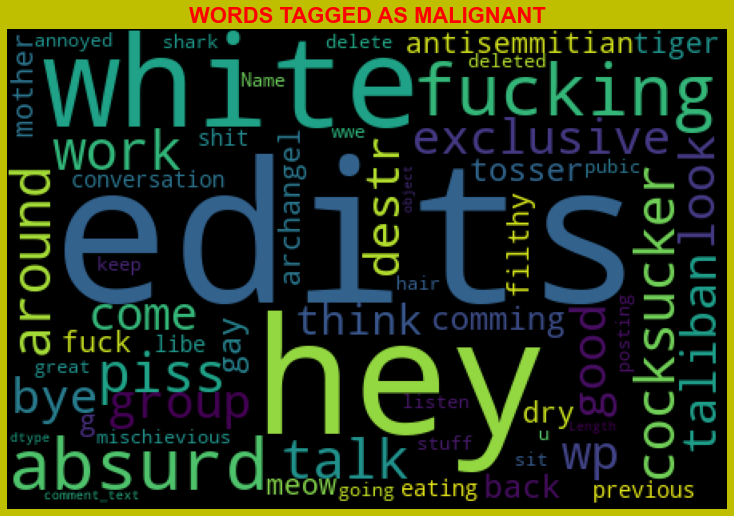

In [32]:
## Word Cloud for WORDS TAGGED AS MALIGNANT
# Plotting for malignant
df_malignant=df[(df['malignant']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="black").generate(str(df_malignant['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS MALIGNANT',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'red'})
plt.show()


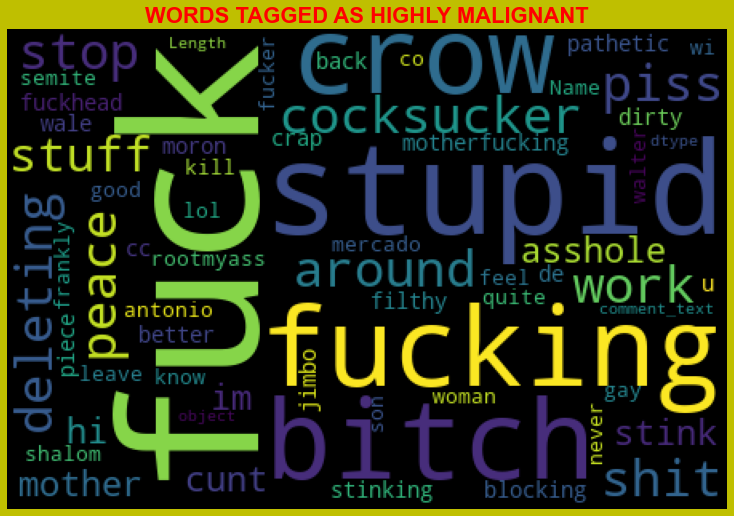

In [33]:
## Word Cloud for WORDS TAGGED AS Highly_Malignant
# Plotting for highly malignant
df_malignant=df[(df['highly_malignant']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="black").generate(str(df_malignant['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS HIGHLY MALIGNANT',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'red'})
plt.show()


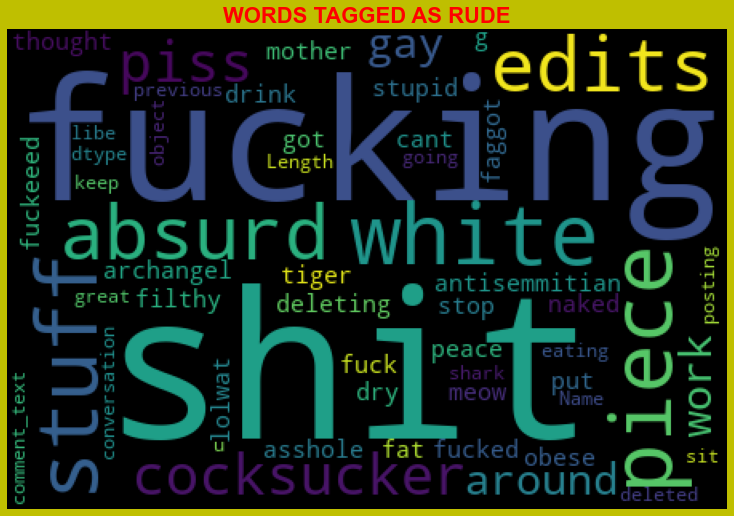

In [34]:
## Word Cloud for WORDS TAGGED AS Rude
# Plotting for rude
df_malignant=df[(df['rude']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="black").generate(str(df_malignant['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS RUDE',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'red'})
plt.show()


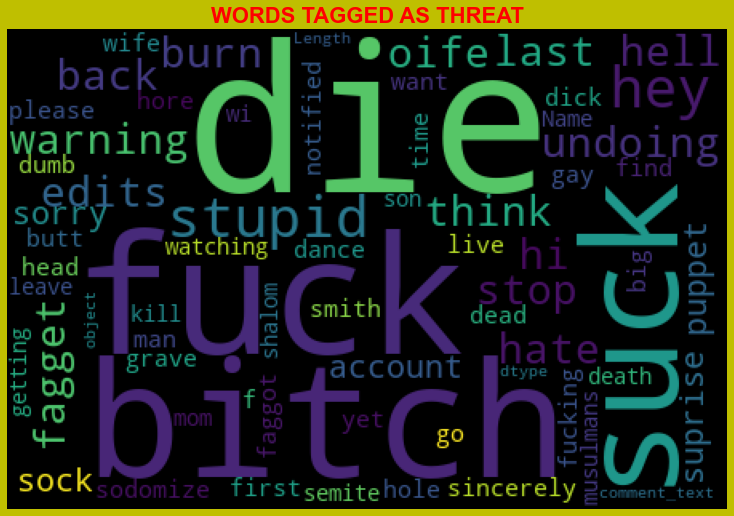

In [35]:
## Word Cloud for WORDS TAGGED AS Threat
# Plotting for threat
df_malignant=df[(df['threat']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="black").generate(str(df_malignant['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS THREAT',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'red'})
plt.show()


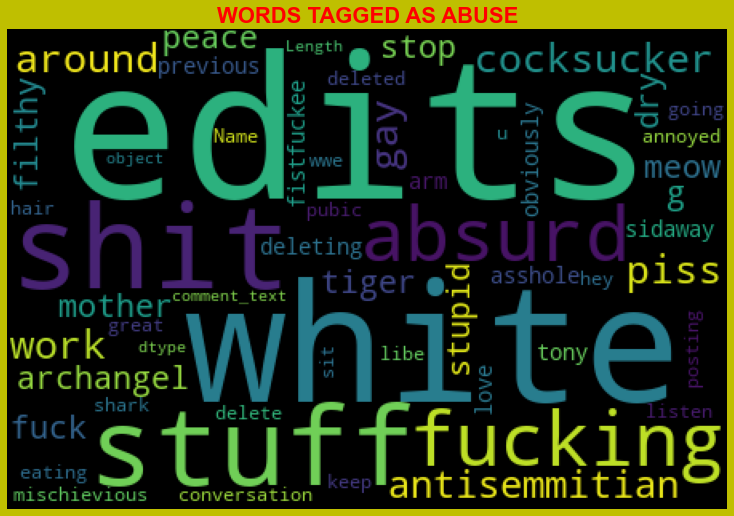

In [36]:
## Word Cloud for WORDS TAGGED AS Abuse
# Plotting for abuse
df_malignant=df[(df['abuse']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=200,background_color="black").generate(str(df_malignant['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS ABUSE',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'red'})
plt.show()


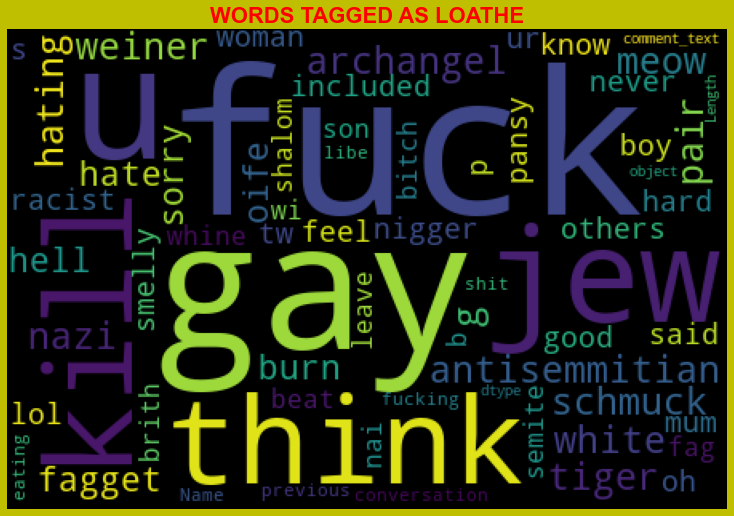

In [37]:
## Word Cloud for WORDS TAGGED AS Loathe
# Plotting for loathe
df_malignant=df[(df['loathe']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=500,background_color="black").generate(str(df_malignant['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS LOATHE',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'red'})
plt.show()


In [38]:
## Delete unnecessary column id
df.drop('id', axis =1,inplace = True)

From above word cloud images the words which have appeared in very large font, their frequency is more 
than other words in each type of comment.

# Separating independent and dependent variables
1. Vectorizer & Spliting Train dataset


In [39]:
# Converting the features into number vectors
tf_vec = TfidfVectorizer(max_features = 2000, stop_words='english')


In [40]:
# Let's Separate the input and output variables represented by X and y respectively in train data and convert them
X = tf_vec.fit_transform(df['comment_text']).toarray()


In [41]:
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,length_after_cleaning
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,264,156
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,0,112,67
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,0,622,364
4,sir hero chance remember page,0,0,0,0,0,0,0,67,29


In [42]:
output_labels= df.columns[1:7]

In [43]:
# output variables
from scipy.sparse import csr_matrix
Y = csr_matrix(df[output_labels]).toarray()

# checking shapes of input and output variables to take care of data imbalance issue
print("Input Variable Shape:", X.shape)
print("Output Variable Shape:", Y.shape)


Input Variable Shape: (159571, 2000)
Output Variable Shape: (159571, 6)


2. Vectorizer & Spliting Test dataset

In [45]:
# Doing the above process for test data 
test_vec = tf_vec.fit_transform(df_test['comment_text'])
test_vec


<153164x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 2138290 stored elements in Compressed Sparse Row format>

# Model Building

In [46]:
!pip install scikit-multilearn


In [48]:
!pip install xgboost

In [49]:
#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC, LinearSVC
#from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import hamming_loss, log_loss


In [50]:
import timeit, sys
import tqdm.notebook as tqdm


In [51]:
# 3. Training and Testing Model on our train dataset

# Creating a function to train and test model
def build_models(models,x,y,test_size=0.33,random_state=13):
    # spliting train test data using train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=random_state)
    
    # training models using BinaryRelevance of problem transform
    for i in tqdm.tqdm(models,desc="Building Models"):
        start_time = timeit.default_timer()
        
        sys.stdout.write("\n=======================================================================================\n")
        sys.stdout.write(f"Current Model in Progress: {i} ")
        sys.stdout.write("\n=======================================================================================\n")
        
        br_clf = BinaryRelevance(classifier=models[i]["name"],require_dense=[True,True])
        print("Training: ",br_clf)
        br_clf.fit(x_train,y_train)
        
        print("Testing: ")
        y_pred = br_clf.predict(x_test)
        
        ham_loss = hamming_loss(y_test,y_pred)
        sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
        ac_score = accuracy_score(y_test,y_pred)
        sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
        cl_report = classification_report(y_test,y_pred)
        sys.stdout.write(f"\n{cl_report}")
        
        end_time = timeit.default_timer()
        sys.stdout.write(f"Completed in [{end_time-start_time} sec.]")
        
        models[i]["trained"] = br_clf
        models[i]["hamming_loss"] = ham_loss
        models[i]["accuracy_score"] = ac_score
        models[i]["classification_report"] = cl_report
        models[i]["predict_y"] = y_pred
        models[i]["time_taken"] = end_time - start_time
                      
        sys.stdout.write("\n=======================================================================================\n")
    
    models["x_train"] = x_train
    models["y_train"] = y_train
    models["x_test"] = x_test
    models["y_test"] = y_test
    
    return models


In [53]:
# Preparing the list of models for classification purpose
models = {
          "Logistic Regression": {"name": LogisticRegression()},
          "Random Forest Classifier": {"name": RandomForestClassifier()},
          "Support Vector Classifier": {"name": LinearSVC(max_iter = 3000)},
          "Ada Boost Classifier": {"name": AdaBoostClassifier()},
          "Decision Tree Classifier": {"name":DecisionTreeClassifier()},
          "KNeighbors Classifier" :{"name":KNeighborsClassifier()},
          "Random Forest Classifier" :{"name":RandomForestClassifier()},
          "Gradient Boosting Classifier" : {"name":GradientBoostingClassifier()},
          "XGBClassifier": {"name":XGBClassifier()},
          "MultinomialNB": {"name":MultinomialNB()},
         }

# Taking one forth of the total data for training and testing purpose
half = len(df)//4
trained_models = build_models(models,X[:half,:],Y[:half,:])


Building Models:   0%|          | 0/9 [00:00<?, ?it/s]


Current Model in Progress: Logistic Regression 
Training:  BinaryRelevance(classifier=LogisticRegression(), require_dense=[True, True])
Testing: 

	Hamming Loss  : 0.0224838587162932
	Accuracy Score: 0.9102164830991265
              precision    recall  f1-score   support

           0       0.93      0.52      0.67      1314
           1       0.61      0.20      0.30       151
           2       0.93      0.55      0.69       710
           3       1.00      0.02      0.05        41
           4       0.82      0.42      0.56       680
           5       0.89      0.13      0.23       128

   micro avg       0.90      0.47      0.61      3024
   macro avg       0.87      0.31      0.42      3024
weighted avg       0.89      0.47      0.60      3024
 samples avg       0.05      0.04      0.04      3024
Completed in [11.940936500000134 sec.]

Current Model in Progress: Random Forest Classifier 
Training:  BinaryRelevance(classifier=RandomForestClassifier(), require_dense=[True, True])

[10:30:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:30:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:31:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:32:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

From the above model comparision it is clear that Linear Support Vector Classifier performs better with Accuracy Score: 91.2% and 
Hamming Loss: 2.08 % than the other classification models.

In [54]:
from sklearn.model_selection import  GridSearchCV

In [55]:
param = {'estimator__penalty' : ['l1', 'l2'],
              'estimator__loss' : ['hinge', 'squared_hinge'],
              'estimator__multi_class' : ['ovr', 'crammer_singer'],
              'estimator__random_state' : [42, 72, 111] }
#SVC = BinaryRelevance(classifier=LinearSVC(),require_dense=[True,True])           
SVC = OneVsRestClassifier(LinearSVC())
GSCV = GridSearchCV(SVC, param, cv=3,verbose = 10)
x_train,x_test,y_train,y_test = train_test_split(X[:half,:], Y[:half,:], test_size=0.30, random_state=42)
GSCV.fit(x_train,y_train)
GSCV.best_params_


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3; 1/24] START estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42
[CV 1/3; 1/24] END estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42; total time=   0.1s
[CV 2/3; 1/24] START estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42
[CV 2/3; 1/24] END estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42; total time=   0.1s
[CV 3/3; 1/24] START estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42
[CV 3/3; 1/24] END estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42; total time=   0.1s
[CV 1/3; 2/24] START estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=72
[CV 1/3; 2/24] END estimator__l

[CV 1/3; 11/24] END estimator__loss=hinge, estimator__multi_class=crammer_singer, estimator__penalty=l2, estimator__random_state=72; total time=   3.4s
[CV 2/3; 11/24] START estimator__loss=hinge, estimator__multi_class=crammer_singer, estimator__penalty=l2, estimator__random_state=72
[CV 2/3; 11/24] END estimator__loss=hinge, estimator__multi_class=crammer_singer, estimator__penalty=l2, estimator__random_state=72; total time=   3.6s
[CV 3/3; 11/24] START estimator__loss=hinge, estimator__multi_class=crammer_singer, estimator__penalty=l2, estimator__random_state=72
[CV 3/3; 11/24] END estimator__loss=hinge, estimator__multi_class=crammer_singer, estimator__penalty=l2, estimator__random_state=72; total time=   2.5s
[CV 1/3; 12/24] START estimator__loss=hinge, estimator__multi_class=crammer_singer, estimator__penalty=l2, estimator__random_state=111
[CV 1/3; 12/24] END estimator__loss=hinge, estimator__multi_class=crammer_singer, estimator__penalty=l2, estimator__random_state=111; total t

[CV 3/3; 20/24] END estimator__loss=squared_hinge, estimator__multi_class=crammer_singer, estimator__penalty=l1, estimator__random_state=72; total time=   2.3s
[CV 1/3; 21/24] START estimator__loss=squared_hinge, estimator__multi_class=crammer_singer, estimator__penalty=l1, estimator__random_state=111
[CV 1/3; 21/24] END estimator__loss=squared_hinge, estimator__multi_class=crammer_singer, estimator__penalty=l1, estimator__random_state=111; total time=   3.1s
[CV 2/3; 21/24] START estimator__loss=squared_hinge, estimator__multi_class=crammer_singer, estimator__penalty=l1, estimator__random_state=111
[CV 2/3; 21/24] END estimator__loss=squared_hinge, estimator__multi_class=crammer_singer, estimator__penalty=l1, estimator__random_state=111; total time=   3.5s
[CV 3/3; 21/24] START estimator__loss=squared_hinge, estimator__multi_class=crammer_singer, estimator__penalty=l1, estimator__random_state=111
[CV 3/3; 21/24] END estimator__loss=squared_hinge, estimator__multi_class=crammer_singer,

{'estimator__loss': 'hinge',
 'estimator__multi_class': 'ovr',
 'estimator__penalty': 'l2',
 'estimator__random_state': 42}

# Final Model
## Providing best parameters to the model:-

In [56]:
Final_Model = OneVsRestClassifier(LinearSVC(loss='hinge', 
            multi_class='ovr', penalty='l2', random_state=42))

Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)
h_loss = hamming_loss(y_test,fmod_pred)*100
print("Hamming loss for the Best Model is:", h_loss)


Accuracy score for the Best Model is: 91.26002673796792
Hamming loss for the Best Model is: 2.0819407308377897


So we can see our model gives same accuracy as earlier.

In [57]:
print(y_test.shape[1])

6


# AOC - ROC Curve of Final Model

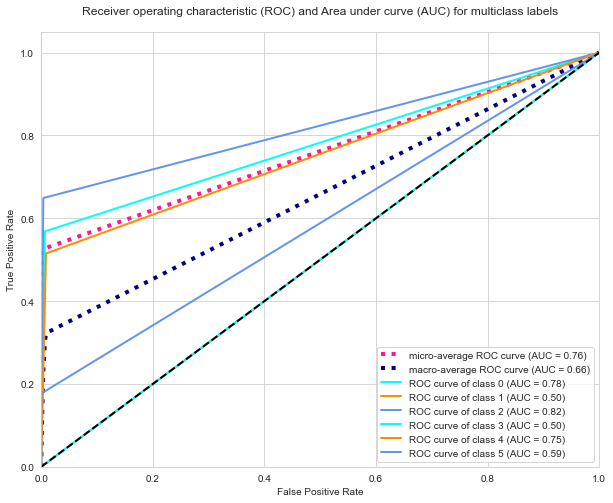

In [65]:
from itertools import cycle

n_classes = y_test.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], fmod_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), fmod_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.rcParams["figure.figsize"] = (10,8) # used to change the output figure size

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (AUC = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (AUC = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic (ROC) and Area under curve (AUC) for multiclass labels\n")
plt.legend(loc="lower right")
plt.show()



# Confusion Matrix of Final Model

In [66]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, multilabel_confusion_matrix
print("Confusion matrix:\n\n", multilabel_confusion_matrix(y_test, fmod_pred))


Confusion matrix:

 [[[10720    73]
  [  507   668]]

 [[11833     0]
  [  135     0]]

 [[11268    42]
  [  231   427]]

 [[11930     0]
  [   38     0]]

 [[11274    98]
  [  289   307]]

 [[11869     3]
  [   79    17]]]


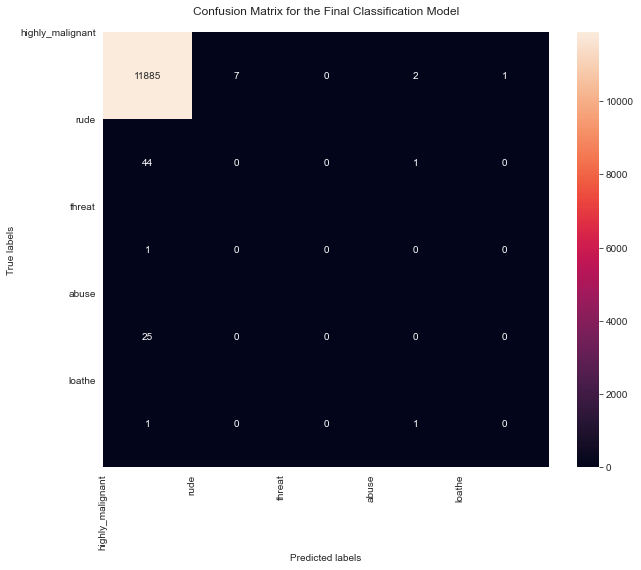

In [72]:
import matplotlib.ticker as plticker
plt.rcParams["figure.figsize"] = (10,8) # used to change the output figure size
ax= plt.subplot()
cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(fmod_pred).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  # annot=True to annotate cells, ftm='g' to disable scientific notation

# title, labels and ticks
ax.set_title('Confusion Matrix for the Final Classification Model\n'); 
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels'); 
loc = plticker.MultipleLocator()
ax.xaxis.set_major_locator(loc); ax.yaxis.set_major_locator(loc);
ax.set_xticklabels(comments_labels); ax.set_yticklabels(comments_labels);
plt.xticks(rotation=90); plt.yticks(rotation=0);
plt.show()


# Model Saving or Serialization

In [81]:
# selecting the best model
best_model = trained_models['Support Vector Classifier']['trained']

# saving the best classification model
import pickle
filename = 'Malignant_comments_classifier.pickle'
pickle.dump(best_model,open(filename,'wb'))


# Test Dataset Predictions

In [84]:
# saving the best classification model
import pickle
best_model = pickle.load(open('Malignant_comments_classifier.pickle','rb'))


In [85]:
test_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [86]:
# Make predictions and view the results
predict_test = best_model.predict(test_vec.toarray())

# Saving predicted values into a CSV file
pd.DataFrame(predict_test).to_csv('Predicted_test_output.csv')

In [87]:
df1 = pd.read_csv('Predicted_test_output.csv')
df1.drop("Unnamed: 0", axis=1, inplace=True)
df1.rename({'0':'malignant', '1':'highly_malignant', '2':'rude', '3':'threat', '4':'abuse', '5':'loathe'}, 
           axis='columns', inplace=True)
df2=df_test.copy()
df = pd.concat([df2, df1], axis=1)
df

,id,comment_text,length_before_cleaning,length_after_cleaning,malignant
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,367,235,NaN
1,0000247867823ef7,rfc title fine imo,50,18,NaN
2,00013b17ad220c46,source zawe ashton lapland,54,26,NaN
3,00017563c3f7919a,look back source information updated correct f...,205,109,NaN
4,00017695ad8997eb,anonymously edit article,41,24,NaN
...,...,...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing long crap,60,37,NaN
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...,198,107,NaN
153161,fffda9e8d6fafa9e,okinotorishima category see change agree corre...,423,238,NaN
153162,fffe8f1340a79fc2,one founding nation eu germany law return quit...,502,319,NaN


In [88]:
df.to_csv('test_dataset_predictions2.csv', index=False)